
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
## Cleaning up the data
data.columns=["Month","Sales"]
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
## Drop last 2 rows
data.drop(106,axis=0,inplace=True)

In [7]:
data.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [8]:
data.drop(105,axis=0,inplace=True)

In [9]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
# Convert Month into Datetime
data['Month']=pd.to_datetime(data['Month'])

In [11]:
data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [12]:
data.set_index('Month',inplace=True)

In [13]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [14]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

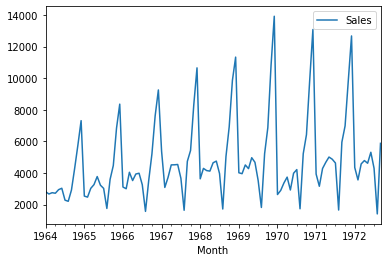

In [15]:
data.plot()

#### Test for stationary

##### The Dickey-Fuller test helps us to find whether our data is stationary or not.

### Ho: It is non stationary
### H1: It is stationary

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(data['Sales'])

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

## Stationary Test 1

In [18]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [19]:
adfuller_test(data['Sales'])

ADF Test Statistic : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Stationary Test 2

##### M is constant
##### STD is constant
##### There is no seasonality.
#### if this three condition fall right then the given data is stationary

In [20]:
rolmean = data.rolling(window=12).mean()

In [21]:
rolstd = data.rolling(window=12).std()

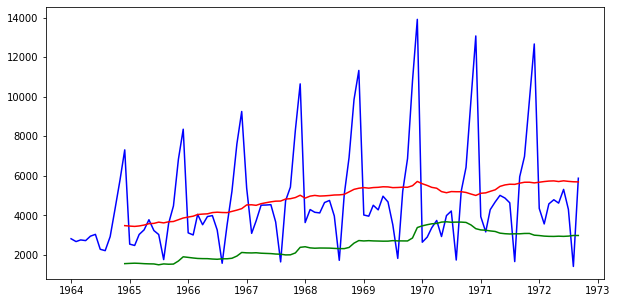

In [22]:
## plot Rolling statistics
plt.figure(figsize=(10,5))
orig=plt.plot(data,color = 'blue',label='Original')
mean=plt.plot(rolmean,color='red',label="Rolling Mean")
std=plt.plot(rolstd,color='green',label="Rolling Std")

# To Make Data is stationary

## Differencing

In [23]:
data['Sales First Difference'] = data['Sales']-data['Sales'].shift(1)

In [24]:
data['Seasonal First Difference']=data['Sales']-data['Sales'].shift(12)

In [25]:
data.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [26]:

## Again test dickey fuller test
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


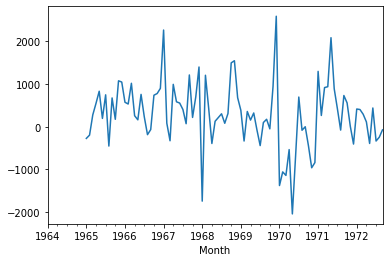

In [27]:
data['Seasonal First Difference'].plot()

In [28]:
rolmean = data['Seasonal First Difference'].rolling(window=12).mean()
rolstd = data['Seasonal First Difference'].rolling(window=12).std()

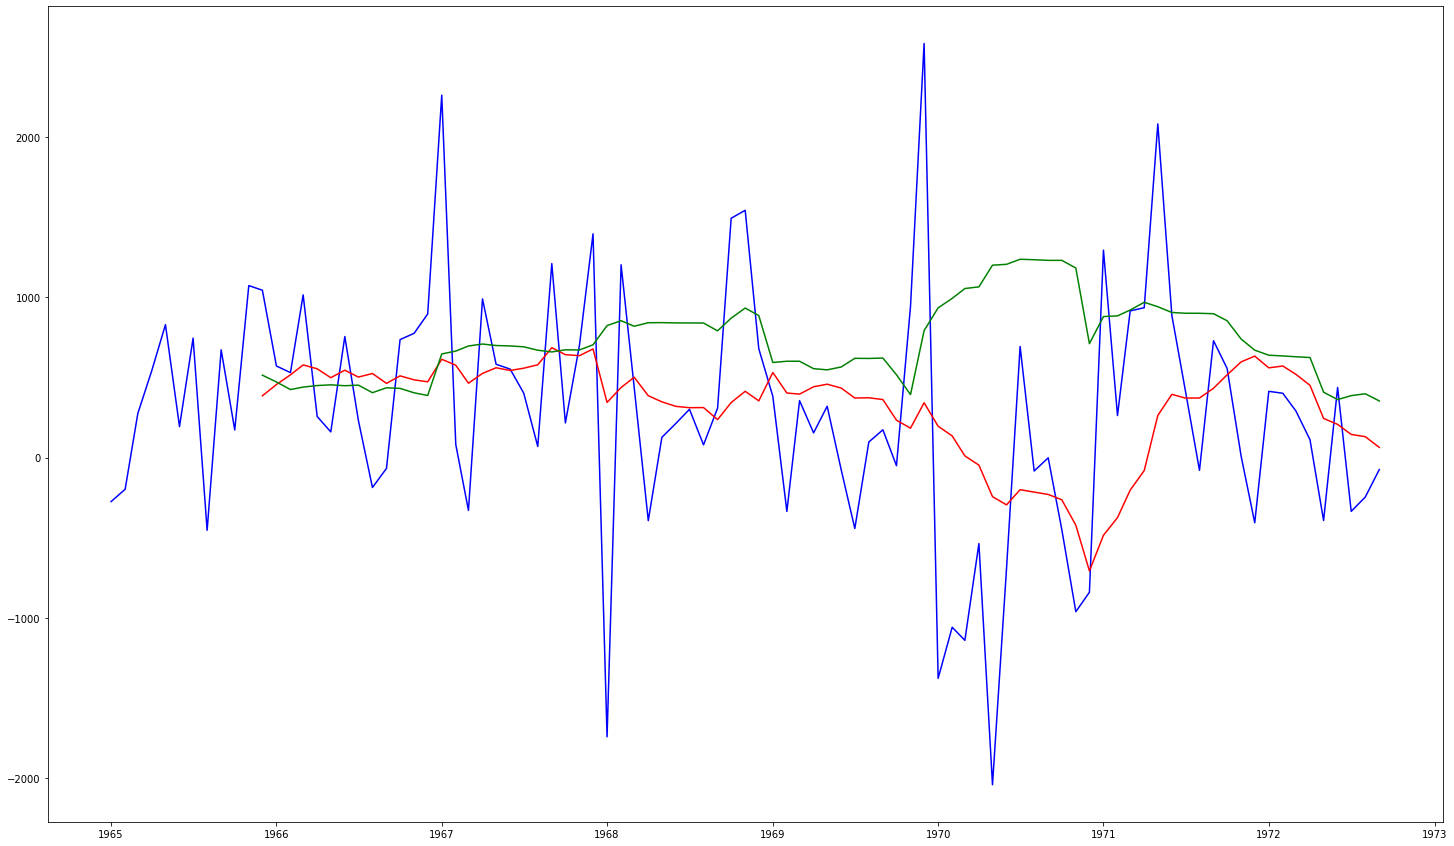

In [29]:
## plot Rolling statistics
plt.figure(figsize=(25,15))
orig=plt.plot(data['Seasonal First Difference'],color = 'blue',label='Original')
mean=plt.plot(rolmean,color='red',label="Rolling Mean")
std=plt.plot(rolstd,color='green',label="Rolling Std")

## Auto Regressive Model
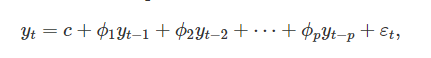

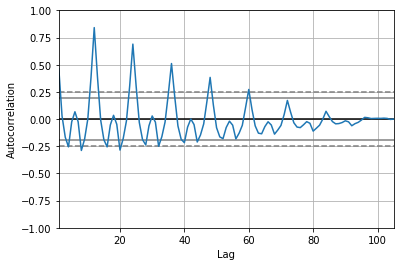

In [30]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [31]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [32]:
##ARIMA - AutoRegressive(p) Integrated (d) Moving Average(q)
##D distance of the value (A-A2) Value may test vary 0,1 and max 2
## AIRMA (p,d,q)
## plot_acf(data)  ## indentify parameters  Q 2,3,4
### plot_pacf(data)  ## indentify parameters  p 2,3

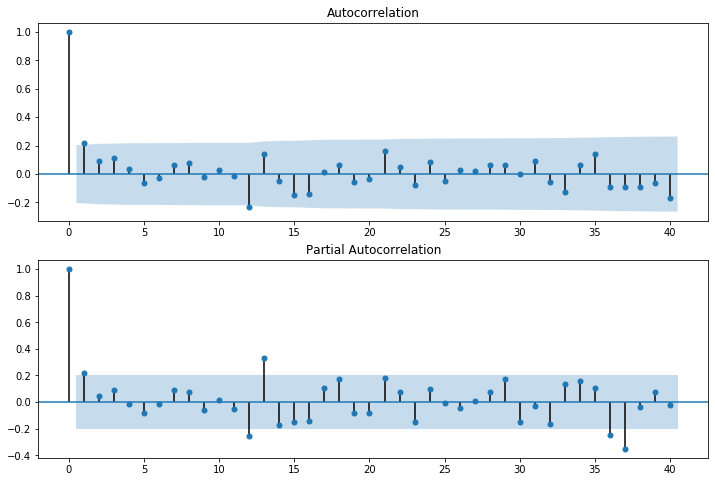

In [33]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

## p=1 d=1 q= 1

## Note : ARIMA Model Work only if the data is non-seasonal.

In [34]:
# let try with seasonal data. 
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [35]:
model=ARIMA(data['Sales'],order=(1,1,1))##order(p,d,q)
model_fit=model.fit()

C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Mon, 23 Mar 2020   AIC                           1910.251
Time:                        02:34:40   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7822     12.405      1.836      0.069      -1.532      47.096
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

In [38]:
data.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,22.889799
1972-06-01,5312.0,694.0,438.0,22.828938
1972-07-01,4298.0,-1014.0,-335.0,22.802503
1972-08-01,1413.0,-2885.0,-246.0,22.791021
1972-09-01,5877.0,4464.0,-74.0,NaN


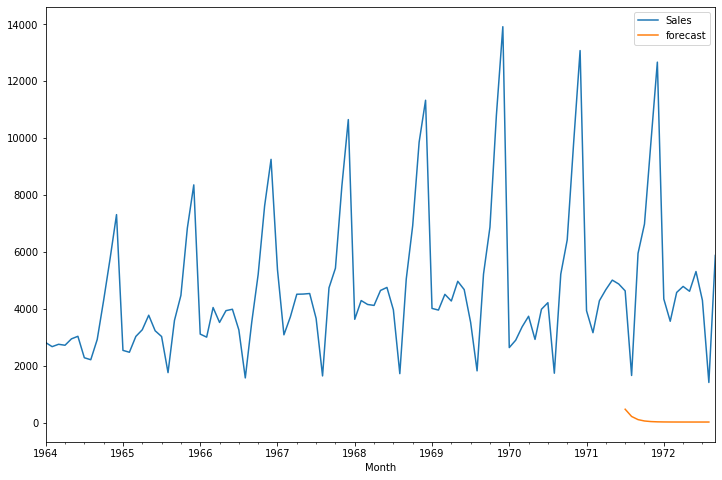

In [39]:
data[['Sales','forecast']].plot(figsize=(12,8))

## As excepted ARIMA don't work on seasonal data.

## SARIMA - Work only for Seasonal Data

In [40]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\z023208\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


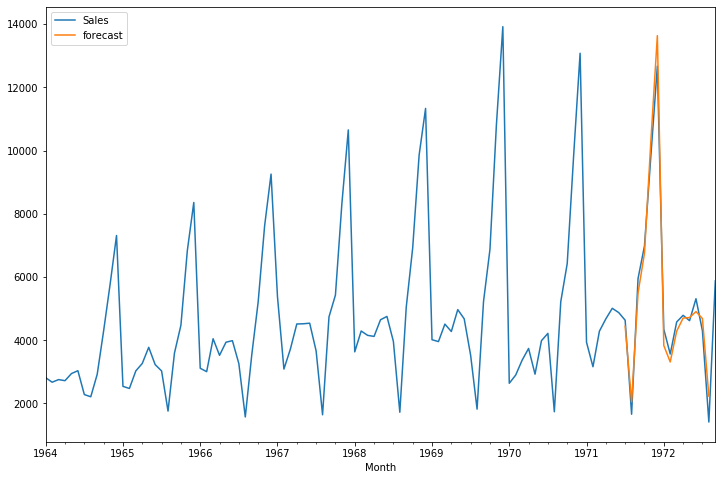

In [41]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

## Furture 2 Years

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [43]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [44]:
future_datest_data.tail() ##Future Data 1973 and 1974

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [45]:
future_data=pd.concat([data,future_datest_data])

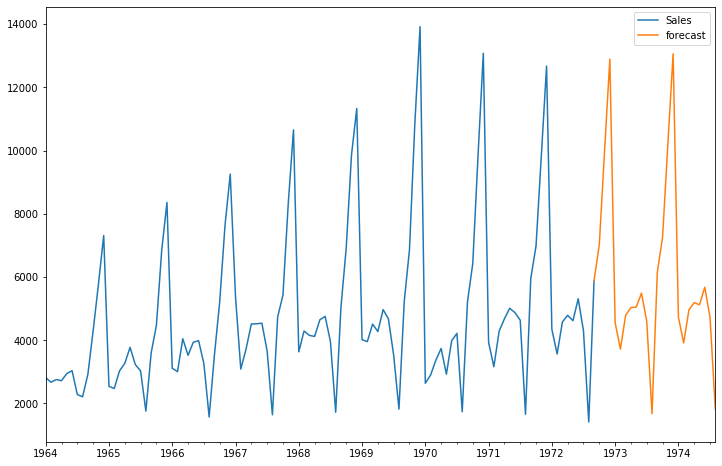

In [51]:
future_data['forecast'] = results.predict(start = 104, end = 128, dynamic= True)  
future_data[['Sales', 'forecast']].plot(figsize=(12, 8))

In [52]:
future_data['forecast'].tail(10)

1973-11-01    10194.735869
1973-12-01    13057.412351
1974-01-01     4731.201301
1974-02-01     3915.317986
1974-03-01     4961.391552
1974-04-01     5189.453100
1974-05-01     5119.495295
1974-06-01     5675.242682
1974-07-01     4726.202433
1974-08-01     1823.475404
Name: forecast, dtype: float64

In [50]:
len(future_data['forecast'])

128

In [54]:
future_data.tail(24)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-09-01,5877.0,4464.0,-74.0,5878.712076
1972-10-01,NaN,NaN,NaN,7024.263279
1972-11-01,NaN,NaN,NaN,9996.419731
1972-12-01,NaN,NaN,NaN,12892.152475
1973-01-01,NaN,NaN,NaN,4561.509842
1973-02-01,NaN,NaN,NaN,3718.817852
1973-03-01,NaN,NaN,NaN,4792.361269
1973-04-01,NaN,NaN,NaN,5034.610647
1973-05-01,NaN,NaN,NaN,5047.956834
1973-06-01,NaN,NaN,NaN,5488.573545
